### ML LAB FINAL EXAM: 
### SHIVANSHI MAHESHWARI
### 21BDA33
### 08 AUGUST, 2022

### Use as training set the labeled (good/spam) text messages attached to build a robust treebased binary classifier that is capable of distinguishing spam text messages from regular ones. -Dataset: https://sjcacblr.sharepoint.com/:t:/s/21BDA-MSc/EeugNdtvoNFPvp96tS8ifRgBqEmjZh1iYTnVuRtMnOPDuw?e=W1Phl2

In [1]:
#importing the models
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### DATA PREPROCESSING

In [2]:
#Reading the Text file
dataset = pd.read_csv("/Users/shivanshi/Downloads/spam_classification.txt",header = None,delimiter="\t")

In [3]:
#Giving it column names
dataset.columns = ['Category', 'Message']

In [4]:
dataset.head()

,Category,Message
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Checking for Null Values
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

##### NO MISSING VALUES FOUND

In [6]:
#Storing dataframe into csv file
dataset.to_csv('spam_classification.csv', index = None)

In [7]:
#Reading the csv file
ds=pd.read_csv("/Users/shivanshi/Downloads/spam_classification.csv")

In [8]:
ds.head()

,Category,Message
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


### EXPLORATORY DATA ANALYSIS

In [9]:
len(ds)

5572

In [10]:
ds.columns

Index(['Category', 'Message'], dtype='object')

In [11]:
ds.shape

(5572, 2)

In [12]:
sum(ds['Category']=='good')

4825

In [13]:
sum(ds['Category']=='spam')

747

In [14]:
ds.Category.value_counts()

good    4825
spam     747
Name: Category, dtype: int64

In [15]:
ds.Category.value_counts(normalize=True)

good    0.865937
spam    0.134063
Name: Category, dtype: float64

In [16]:
ds.describe()

,Category,Message
count,5572,5572
unique,2,5158
top,good,"Sorry, I'll call later"
freq,4825,30


In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

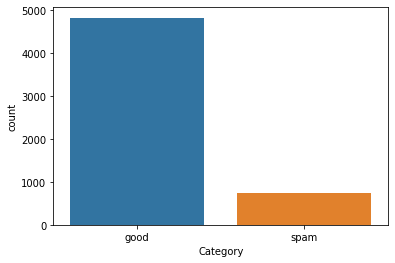

In [18]:
sns.countplot(ds['Category'])

In [19]:
sum(ds['Category']=='spam')/len(ds)

0.13406317300789664

#### ~13.41% of the messages in our dataset are spam. This is an imbalance in data

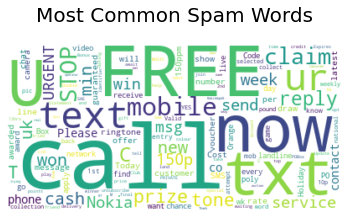

In [20]:
from wordcloud import WordCloud
spam_messages =ds[ds.Category == 'spam']

spam_texts = " ".join(text for text in spam_messages['Message'])

spam_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(spam_texts)

plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Most Common Spam Words', fontsize=20, y=1.1)
plt.axis("off");

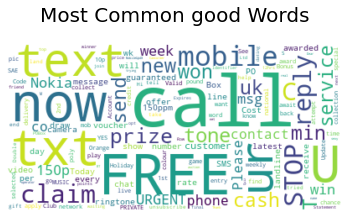

In [21]:
good_messages =ds[ds.Category == 'good']

good_texts = " ".join(text for text in spam_messages['Message'])

good_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(good_texts)

plt.imshow(good_cloud, interpolation='bilinear')
plt.title('Most Common good Words', fontsize=20, y=1.1)
plt.axis("off");

In [22]:
# Assigning 0 to Good and 1 to Spam

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [23]:
ds['Category']=encoder.fit_transform(ds['Category'])

In [24]:
ds.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
#check for duplicate values
ds.duplicated().sum()

414

In [26]:
# Removing Duplicate Values
ds=ds.drop_duplicates(keep='first')

/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

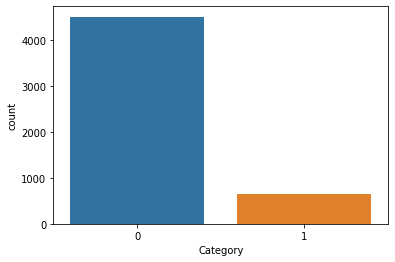

In [27]:
sns.countplot(ds['Category'])

In [28]:
ds.shape

(5158, 2)

In [29]:
ds.Category.value_counts()

0    4516
1     642
Name: Category, dtype: int64

In [30]:
sum(ds['Category']==1)/len(ds)

0.12446684761535479

### After Removing Duplicate Values, ~12.5% messages are spam.

### DATA CLEANING
### https://youtu.be/YncZ0WwxyzU - Followed the tutorial for understanding nltk
### Also Referred to nltk documentation: https://www.nltk.org

In [31]:
import nltk

In [32]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df=sns.load_dataset("titanic")

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/shivanshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
ds['char_count']=ds['Message'].apply(len)

In [36]:
#number of words
ds['word_count']=ds['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
#number of sentences
ds['sentence_count']=ds['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
ds.head()

,Category,Message,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
ds[['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,5158.000000,5158.000000,5158.000000
mean,79.153742,18.565917,1.951532
std,58.395785,13.405398,1.363524
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [40]:
#FOR GOOD MESSAGES
ds[ds['Category']==0][['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.872232,17.264836,1.806244
std,56.711801,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [41]:
#FOR SPAM MESSAGES
ds[ds['Category']==1][['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,642.000000,642.000000,642.000000
mean,137.408100,27.718069,2.973520
std,29.977971,7.033902,1.479211
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


#### Comparing Good and Spam Messages: the Mean Character Count in Good messages is much lesser then that in Spam Messages and so are the other 2 counts.

<AxesSubplot:>

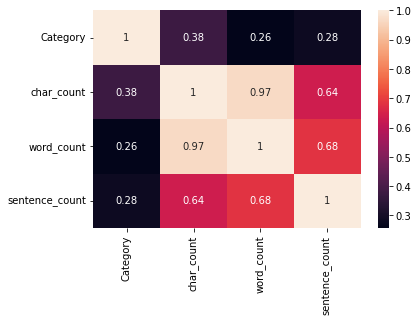

In [42]:
sns.heatmap(ds.corr(),annot=True)

### Data has multicollinearity

#### Writing a Function for Tranforming the messages to lower case, Removing Special Characters and Stop-Words. Then Performing Stemming

In [43]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string

def transform_text(text):
    text=text.lower()
    y=list()
    #Tokenizing
    text=nltk.word_tokenize(text)
    #print(text)
    
    #Removing Special Characters
    for i in text:
        if i.isalnum():
            #y.concat(i)
            y=y+[i]
    text=y[:]
    y.clear()
    
    #Removing Stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    #Stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [44]:
ds['transformed_text']=ds['Message'].apply(transform_text)

In [45]:
ds.tail()

,Category,Message,char_count,word_count,sentence_count,transformed_text
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


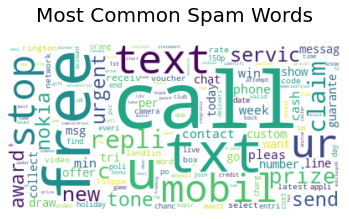

In [46]:
from wordcloud import WordCloud
spam_messages =ds[ds.Category == 1]

spam_texts = " ".join(text for text in spam_messages['transformed_text'])

spam_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(spam_texts)

plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Most Common Spam Words', fontsize=20, y=1.1)
plt.axis("off");

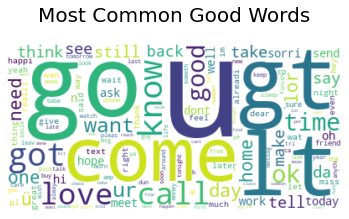

In [47]:
from wordcloud import WordCloud
good_messages =ds[ds.Category == 0]

good_texts = " ".join(text for text in good_messages['transformed_text'])

good_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(good_texts)

plt.imshow(good_cloud, interpolation='bilinear')
plt.title('Most Common Good Words', fontsize=20, y=1.1)
plt.axis("off");

### Plotting a bar to see the distribution of most used words in Spam Messages.

In [48]:
spam=[]
for message in ds[ds['Category']==1]['transformed_text'].tolist():
    for word in message.split():
        spam.append(word)
        

/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


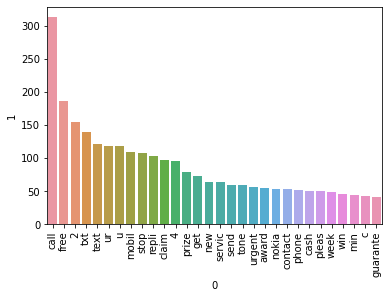

In [49]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam).most_common(30))[0],pd.DataFrame(Counter(spam).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Plotting a bar to see the distribution of most used words in Good Messages.

In [50]:
good=[]
for message in ds[ds['Category']==0]['transformed_text'].tolist():
    for word in message.split():
        good.append(word)
        

/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


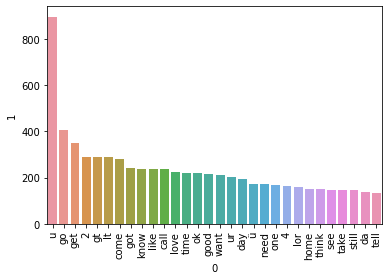

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(good).most_common(30))[0],pd.DataFrame(Counter(good).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Let's See, what can we do!

In [52]:
# Importing the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### We can use a Decision Tree, a Bagging Model, a Random Forest Classifier, an ADA Boosted Model and a Gradient Boosted Model, successively, to notice the respective advantages and disadvantages.
#### We can also Compare the results with Naive Bayes Classifier and SVM


### INPUT SPLIT

In [53]:
x=ds['transformed_text']
y=ds['Category']

### MODEL TRAINING

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,precision_score

def classify(model,x,y):
    #train-test split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,shuffle=True,stratify=y)
    
    #Feature Extraction
    pipeline_model=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',model)])
  
    #model training
    pipeline_model.fit(x_train,y_train)
    
    print("Accuracy:",pipeline_model.score(x_test,y_test)*100)
    
    #cv_score=cross_val_score(model,x,y,cv=5)
    #print("Cross Validation Score:", np.mean(cv_score)*100)
    
    y_pred=pipeline_model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("Precision Score:", precision_score(y_test,y_pred))

## FITTING THE MODEL USING VARIOUS ALGORITHMS

### RANDOM FOREST CLASSIFIER

In [56]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy: 97.28682170542635
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1355
           1       0.99      0.79      0.88       193

    accuracy                           0.97      1548
   macro avg       0.98      0.89      0.93      1548
weighted avg       0.97      0.97      0.97      1548

Precision Score: 0.9934640522875817


### The Accuracy is 97.28% but the precision is 99.35% which is fairly impressive

### DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy: 94.83204134366925
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1355
           1       0.82      0.75      0.78       193

    accuracy                           0.95      1548
   macro avg       0.89      0.86      0.88      1548
weighted avg       0.95      0.95      0.95      1548

Precision Score: 0.8192090395480226


### The Accuracy is 94.83% but precision score is 81.92% which is poor.

### DECISION TREE WITH GINI INDEX

In [58]:
# Decision tree with gini
model_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 123,max_depth=10, min_samples_leaf=6)
classify(model_gini,x,y)

Accuracy: 94.18604651162791
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1355
           1       0.87      0.63      0.73       193

    accuracy                           0.94      1548
   macro avg       0.91      0.81      0.85      1548
weighted avg       0.94      0.94      0.94      1548

Precision Score: 0.8652482269503546


### The Accuracy is 94.18% which is okay but Precision Score is again Poor and it remains in the same area even when the values of the parameters are changed

### DECISION TREE WITH ENTROPY

In [59]:
# Decision tree with entropy
model_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 123,
            max_depth = 10, min_samples_leaf = 6)
classify(model_entropy,x,y)

Accuracy: 93.86304909560724
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1355
           1       0.83      0.64      0.72       193

    accuracy                           0.94      1548
   macro avg       0.89      0.81      0.84      1548
weighted avg       0.94      0.94      0.94      1548

Precision Score: 0.8266666666666667


### The Accuracy is 93.86% which is not very good but Precision Score is again Poor and it remains in the same area even when the values of the parameters are changed

### GRADIENT BOOSTING CLASSIFIER

In [60]:
#Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
classify(model,x,y)

Accuracy: 95.67183462532299
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1355
           1       0.91      0.73      0.81       193

    accuracy                           0.96      1548
   macro avg       0.94      0.86      0.89      1548
weighted avg       0.96      0.96      0.95      1548

Precision Score: 0.9090909090909091


### The Accuracy is 95.67% which is fairly okay and Precision Score is 90.90% which is also okay but it is still less than Random Forest Classifier

### GRADIENT BOOSTING CLASSIFIER WITH VALUES

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
classify(model,x,y)

Accuracy: 93.15245478036177
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1355
           1       0.76      0.66      0.71       193

    accuracy                           0.93      1548
   macro avg       0.86      0.82      0.83      1548
weighted avg       0.93      0.93      0.93      1548

Precision Score: 0.757396449704142


### The Accuracy is 93.15% which is not very good and Precision Score is 75.73% which is Very Poor

### ADABOOST CLASSIFIER

In [62]:
#ADABoost

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
classify(model,x,y)

Accuracy: 96.51162790697676
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1355
           1       0.91      0.80      0.85       193

    accuracy                           0.97      1548
   macro avg       0.94      0.89      0.92      1548
weighted avg       0.96      0.97      0.96      1548

Precision Score: 0.9112426035502958


### The Accuracy is 96.51% which is good and Precision Score is 91.12% which is okay but our random forest Classifier still remains on tops

### ADABOOST WITH PARAMETERS

In [63]:
#ADABoost

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
classify(model,x,y)

Accuracy: 96.70542635658916
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1355
           1       0.89      0.84      0.86       193

    accuracy                           0.97      1548
   macro avg       0.93      0.91      0.92      1548
weighted avg       0.97      0.97      0.97      1548

Precision Score: 0.8901098901098901


### The Accuracy is 96.7% which is good and Precision Score is 89% which is not very good but our random forest Classifier still remains on tops

### BAGGING CLASSIFIER

In [64]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
classify(model,x,y)

Accuracy: 95.34883720930233
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1355
           1       0.89      0.72      0.79       193

    accuracy                           0.95      1548
   macro avg       0.93      0.85      0.88      1548
weighted avg       0.95      0.95      0.95      1548

Precision Score: 0.8903225806451613


### The Accuracy is 95.34% but the precision score is again 89%

### Extra Trees Classifier: 
### Documentation: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjeo4Wr-rb5AhWQ8HMBHZTAAXUQFnoECAQQAQ&url=http%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.ensemble.ExtraTreesClassifier.html&usg=AOvVaw3H4RLyPWcjHHLd9ESuSPep

In [65]:
#Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,x,y)

Accuracy: 97.48062015503875
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1355
           1       0.98      0.81      0.89       193

    accuracy                           0.97      1548
   macro avg       0.98      0.91      0.94      1548
weighted avg       0.97      0.97      0.97      1548

Precision Score: 0.98125


### This classifier has a 97.5% accuracy and a 98.12% Precision Score.

### Out of all the tree based algorithms Performed: the Top Two are:
### 1. RANDOM FOREST CLASSIFIER: ACCURACY - 97.28% and PRECISION - 99.34%
### 2. EXTRA TREES CLASSIFIER: ACCURACY - 97.5% and PRECISION - 98.12%

### But Since our data is imbalanced, here the Precision Score would matter more than the accuracy.

### Now We will compare all these models with Naive Bayes which is mostly used for Text Classification Problems.

In [66]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model,x,y)

Accuracy: 95.67183462532299
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1355
           1       1.00      0.65      0.79       193

    accuracy                           0.96      1548
   macro avg       0.98      0.83      0.88      1548
weighted avg       0.96      0.96      0.95      1548

Precision Score: 1.0


### We can see that the accuracy has reduced a bit but the precision score is perfect

### SUPPORT VECTOR CLASSIFIER

In [67]:
#Support Vector Classifier

from sklearn.svm import SVC
model = SVC()
classify(model,x,y)

Accuracy: 98.1266149870801
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1355
           1       1.00      0.85      0.92       193

    accuracy                           0.98      1548
   macro avg       0.99      0.92      0.95      1548
weighted avg       0.98      0.98      0.98      1548

Precision Score: 1.0


### The accuracy here is better that of all our classifiers and it has a precision score of 1.0

### LOGISTIC REGRESSION

In [68]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy: 96.12403100775194
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1355
           1       0.97      0.71      0.82       193

    accuracy                           0.96      1548
   macro avg       0.97      0.85      0.90      1548
weighted avg       0.96      0.96      0.96      1548

Precision Score: 0.9716312056737588


### The accuracy is good and the precision score also.

### According to the question, The best tree based Classifier is RANDOM FOREST with an accuracy of 97.28% and a precision value of 99.34% but if the data is balanced then maybe the Extra Trees Classifier performs well.
### But When Compared to SVC and Naive Bayes, the SVC performs better in case of accuracy and Precision.
### Also, since our data is imbalanced, Precision score matters more than Accuracy

### Other Resources Reffered: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjb7IDA-rb5AhXQ0nMBHeSNA1AQFnoECEAQAQ&url=https%3A%2F%2Ftowardsdatascience.com%2Ftop-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2&usg=AOvVaw0kzLGqvlbkHm9zJ3xWjlPp